<a href="https://colab.research.google.com/github/kedartatwawadi/ML-learnings/blob/master/keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import packages
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# In the previous tutorial, we trained a simple MNIST classifier
# We constructed the graph using the Functional APIof keras. 
# keras also provides ahigher level symbolic and a lower level Model subclassing API. 


# Functional API
# Let us build out the model in a functional way first
def build_model_functional(inputs):
  x = layers.Conv2D(16, 3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
  x = layers.Conv2D(32, 3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
  x = layers.Conv2D(64, 3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(10)(x)
  model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
  return model

In [7]:
inputs = keras.Input(shape=(28,28,1))
model = build_model_functional(inputs)
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               

In [10]:
#We next implement the symbolic form of building keras models
# Not a big fan of this, as this makes the model much more difficult to edit
def build_model_symbolic(inputs):
    model = keras.Sequential()
    model.add(layers.Conv2D(16, 3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(layers.Conv2D(32, 3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(layers.Conv2D(64, 3, activation="relu"))
    model.add(layers.Flatten())
    model.add(layers.Dense(10))
    return model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

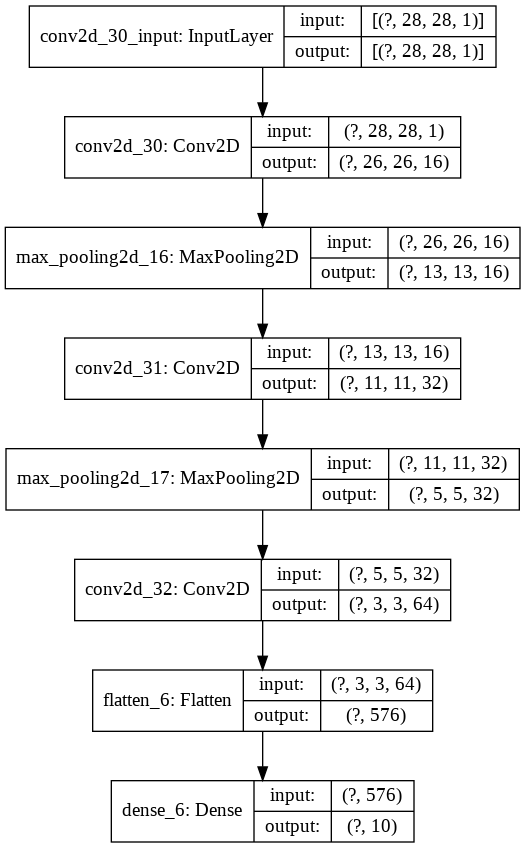

In [20]:
# The symbolic way of forming the model is also exactly the same
inputs = keras.Input(shape=(28,28,1))
model = build_model_symbolic(inputs)

# As input "layer" has not been specified as a part of the model, the model has no clue of its shapes.. so model.build needs to be called
model.build(inputs.shape)
model.summary()
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

Model: "my_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           multiple                  160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_28 (Conv2D)           multiple                  4640      
_________________________________________________________________
conv2d_29 (Conv2D)           multiple                  18496     
Total params: 23,296
Trainable params: 23,296
Non-trainable params: 0
_________________________________________________________________


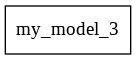

In [19]:
# We will look at a third form of creating the keras model, the Model subclass type
# The tf.keras.Model class requires __init__ and call objects to define 
class myModel(tf.keras.Model):

    def __init__(self):
        super(myModel, self).__init__() #calls the init of the super class
        # define layers
        self.conv_layer1 = layers.Conv2D(16, 3, activation="relu")
        self.max_pool = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))
        self.conv_layer2 = layers.Conv2D(32, 3, activation="relu") 
        self.conv_layer3 = layers.Conv2D(64, 3, activation="relu")
 

    def call(self, inputs):
        x = self.conv_layer1(inputs)
        x = self.max_pool(x)
        x = self.conv_layer2(x)
        x = self.max_pool(x)
        x = self.conv_layer3(x)
        x = layers.Flatten()(x)
        return x


model = myModel()
model.build(inputs.shape)
model.summary()
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True) # Nothing useful is output